# Problem Definition
Flight Price Prediction
Problem Statement: Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket.

In [1]:
from zipfile import ZipFile
import pandas as pd

In [2]:
Train_data=pd.read_excel("C:\\Users\\admin\\Downloads\\Data_Train.xlsx")
Train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
Test_data=pd.read_excel("C:\\Users\\admin\\Downloads\\Test_set.xlsx")
Test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
sample=pd.read_excel("C:\\Users\\admin\\Downloads\\Sample_submission.xlsx")
sample

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [5]:
Test_df=pd.concat([Test_data, sample.reindex(Test_data.index)], axis=1)

In [6]:
Test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934


In [7]:
Test_df.shape

(2671, 11)

In [8]:
frames = [Train_data, Test_df]

In [9]:
data_01=pd.concat(frames)
data_01.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
data_01.shape

(13354, 11)

In [11]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Date_of_Journey  13354 non-null  object
 2   Source           13354 non-null  object
 3   Destination      13354 non-null  object
 4   Route            13353 non-null  object
 5   Dep_Time         13354 non-null  object
 6   Arrival_Time     13354 non-null  object
 7   Duration         13354 non-null  object
 8   Total_Stops      13353 non-null  object
 9   Additional_Info  13354 non-null  object
 10  Price            13354 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


In [12]:
data_01.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
data_01['Route']=data_01['Route'].fillna(data_01['Route'].mode()[0])

In [14]:
data_01['Total_Stops']=data_01['Total_Stops'].fillna(data_01['Total_Stops'].mode()[0])

In [15]:
data_01.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
data_01.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [17]:
data_01['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

The data is of same year that is 2019, so we can only take the month and day column, of this attribute

In [18]:
import datetime

In [19]:
data_01["Journey_day"] = pd.to_datetime(data_01.Date_of_Journey, format="%d/%m/%Y").dt.day
data_01["Journey_month"] = pd.to_datetime(data_01["Date_of_Journey"], format = "%d/%m/%Y").dt.month
data_01.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [20]:
data_01["Dep_hour"] = pd.to_datetime(data_01["Dep_Time"]).dt.hour
data_01["Dep_min"] = pd.to_datetime(data_01["Dep_Time"]).dt.minute
data_01.drop(["Dep_Time"], axis = 1, inplace = True)

In [21]:
data_01["Arrival_hour"] = pd.to_datetime(data_01.Arrival_Time).dt.hour
data_01["Arrival_min"] = pd.to_datetime(data_01.Arrival_Time).dt.minute
data_01.drop(["Arrival_Time"], axis = 1, inplace = True)

In the dataset: The route will not affect the prediction, since we have the arrival and departure time as well as the source and destination. Also, the duration of the journey has no major role since we are already taking arrival and departure time

So dropping Route and Duration of the journey

In [22]:
data1=data_01.drop(columns='Route')
data=data1.drop(columns='Duration')

In [23]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
d1=le.fit_transform(data['Airline'])
d2=le.fit_transform(data['Source'])
d3=le.fit_transform(data['Destination'])
d4=le.fit_transform(data['Total_Stops'])
d5=le.fit_transform(data['Additional_Info'])

In [26]:
data['Airline']=d1
data['Source']=d2
data['Destination']=d3
data['Total_Stops']=d4
data['Additional_Info']=d5

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          13354 non-null  int32
 1   Source           13354 non-null  int32
 2   Destination      13354 non-null  int32
 3   Total_Stops      13354 non-null  int32
 4   Additional_Info  13354 non-null  int32
 5   Price            13354 non-null  int64
 6   Journey_day      13354 non-null  int64
 7   Journey_month    13354 non-null  int64
 8   Dep_hour         13354 non-null  int64
 9   Dep_min          13354 non-null  int64
 10  Arrival_hour     13354 non-null  int64
 11  Arrival_min      13354 non-null  int64
dtypes: int32(5), int64(7)
memory usage: 1.1 MB


In [28]:
data.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
count,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,3.977086,1.954096,1.435450,1.451026,7.407743,11301.720009,13.389846,4.710574,12.513254,24.507264,13.396061,24.664146
std,2.363997,1.178607,1.473368,1.804171,1.198393,6452.843082,8.439060,1.165622,5.736273,18.832385,6.896145,16.559723
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,6135.250000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,0.000000,8.000000,10262.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,4.000000,8.000000,14781.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,11.000000,4.000000,5.000000,4.000000,9.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


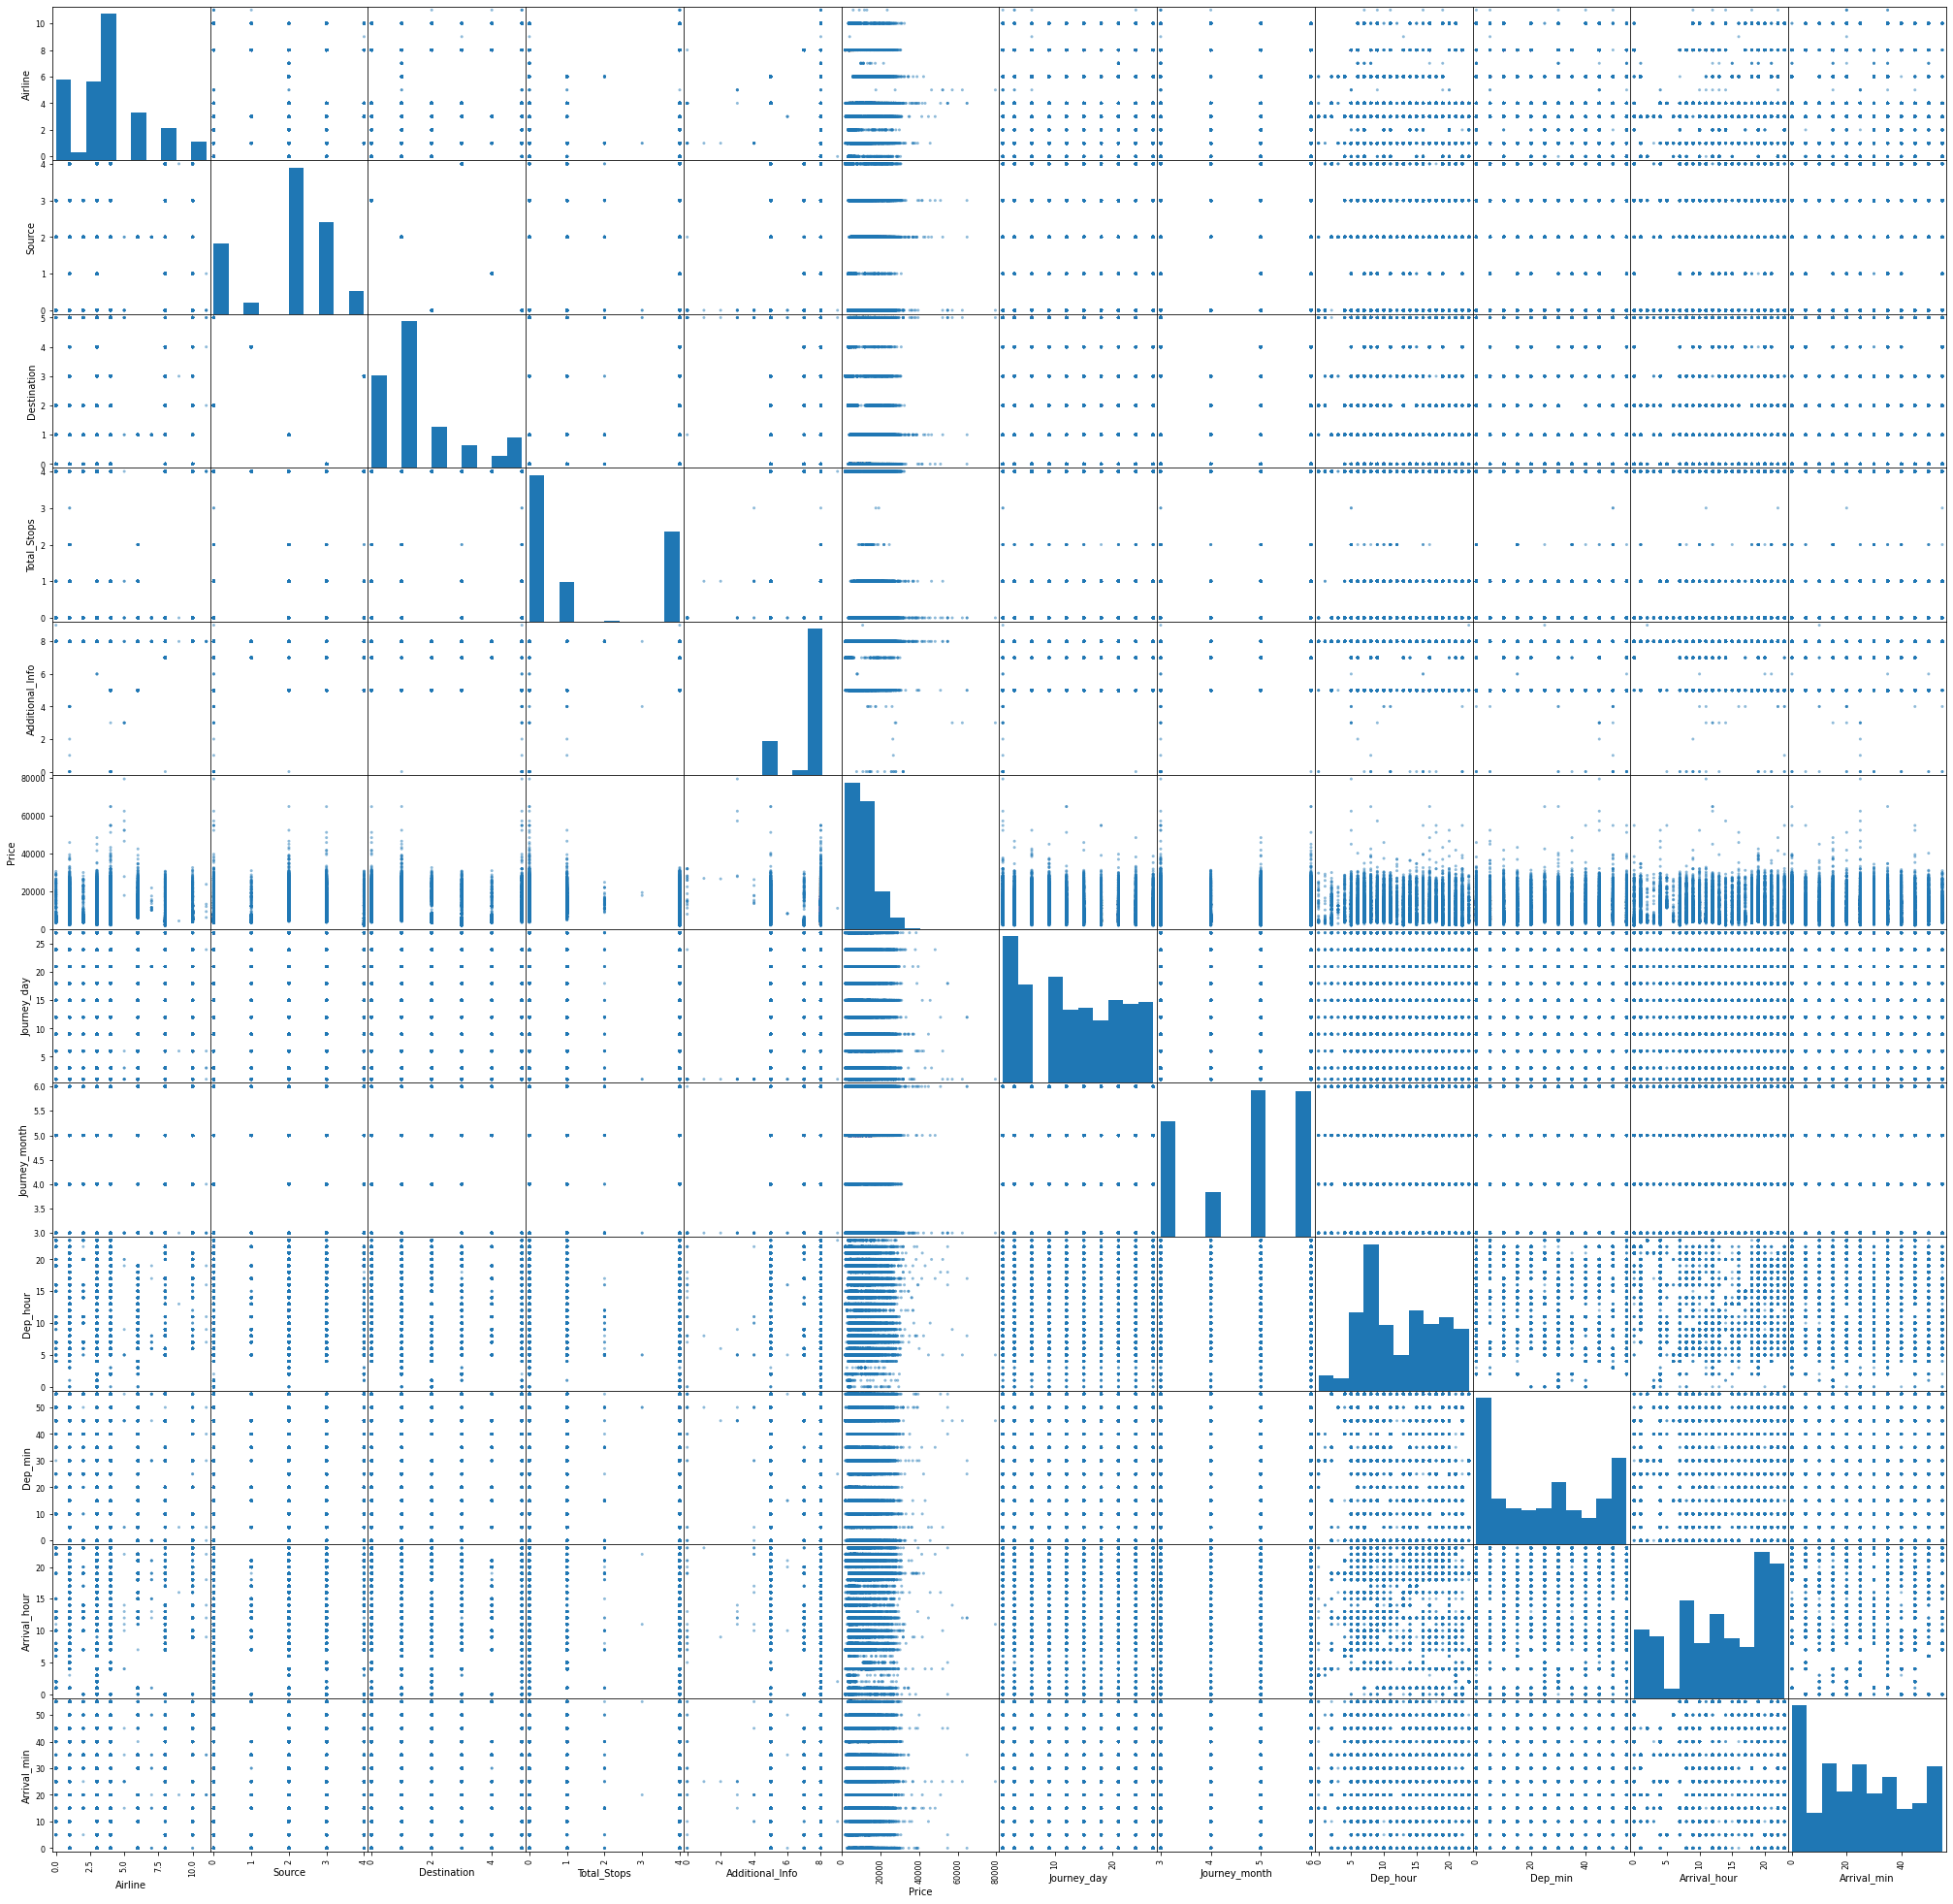

In [29]:
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
scatter_matrix(data, figsize=(35,35))
plt.show()

In [30]:
data.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Airline,1.000000,-0.018547,0.022130,0.038243,-0.058533,-0.016809,0.020666,0.028929,-0.026127,-0.057826,-0.007831,-0.074001
Source,-0.018547,1.000000,-0.589710,-0.223094,-0.022219,0.016235,-0.002568,0.180685,0.058471,-0.058563,0.020766,0.015057
Destination,0.022130,-0.589710,1.000000,0.336562,0.027398,-0.043160,-0.035144,-0.362327,-0.068252,0.133008,-0.032645,0.021234
Total_Stops,0.038243,-0.223094,0.336562,1.000000,0.162039,-0.337871,0.033904,-0.023211,0.045760,0.049313,-0.096015,0.180083
Additional_Info,-0.058533,-0.022219,0.027398,0.162039,1.000000,-0.019336,-0.018370,-0.043376,-0.054881,-0.013346,0.022070,0.039978
Price,-0.016809,0.016235,-0.043160,-0.337871,-0.019336,1.000000,-0.110601,-0.058078,0.011146,-0.006744,0.028762,-0.054816
Journey_day,0.020666,-0.002568,-0.035144,0.033904,-0.018370,-0.110601,1.000000,-0.035495,-0.002970,-0.008988,0.000982,-0.014631
Journey_month,0.028929,0.180685,-0.362327,-0.023211,-0.043376,-0.058078,-0.035495,1.000000,0.034494,-0.069407,-0.003226,-0.110276
Dep_hour,-0.026127,0.058471,-0.068252,0.045760,-0.054881,0.011146,-0.002970,0.034494,1.000000,-0.026674,0.004296,0.067645
Dep_min,-0.057826,-0.058563,0.133008,0.049313,-0.013346,-0.006744,-0.008988,-0.069407,-0.026674,1.000000,0.043967,-0.018133


<AxesSubplot:>

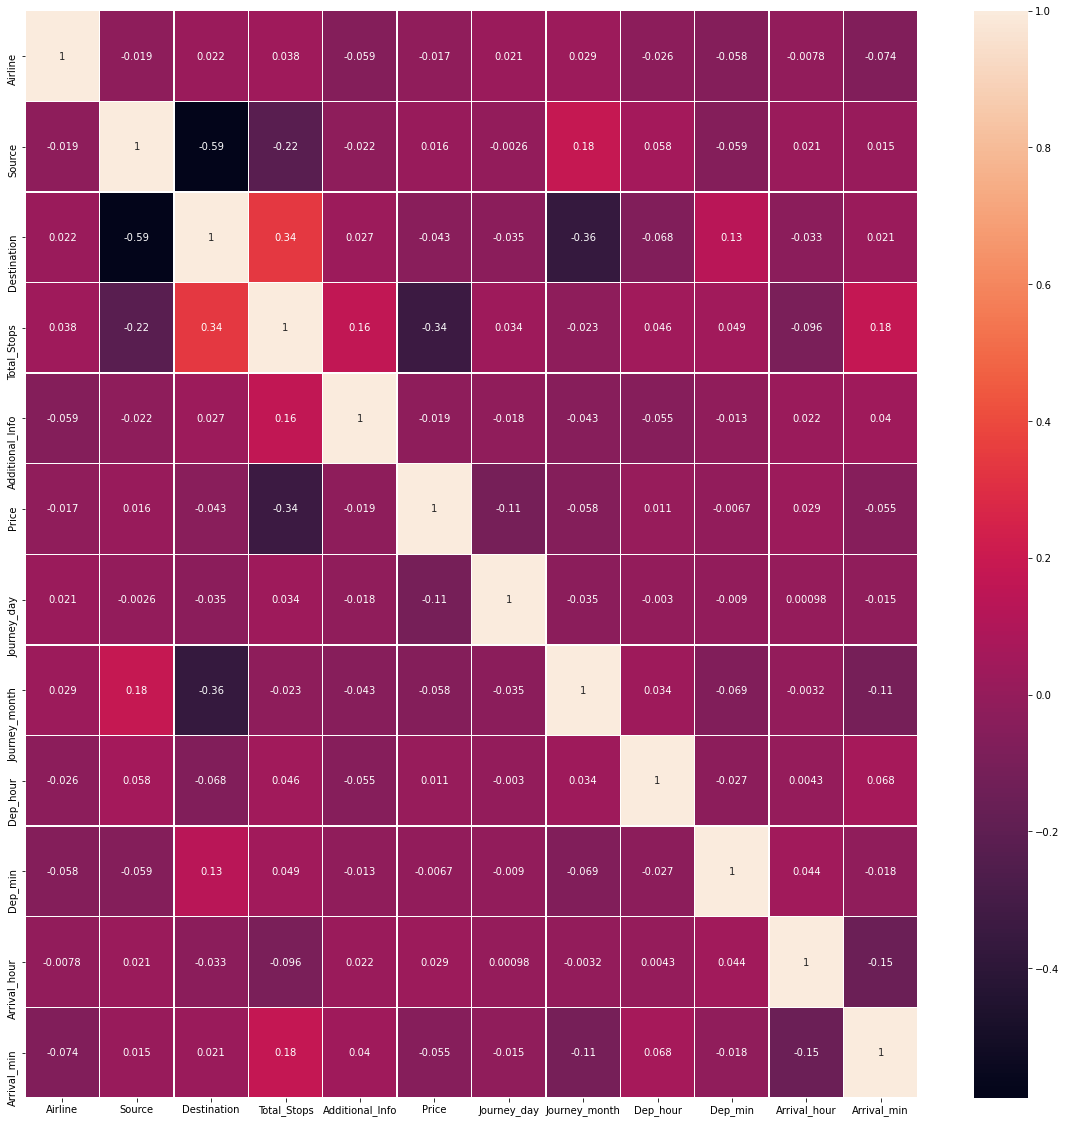

In [31]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data.corr(),annot=True, linewidth=0.5,)

In [32]:
data.skew()

Airline            0.720924
Source            -0.424151
Destination        1.247893
Total_Stops        0.639737
Additional_Info   -1.784752
Price              1.207480
Journey_day        0.135142
Journey_month     -0.390684
Dep_hour           0.109087
Dep_min            0.159397
Arrival_hour      -0.384591
Arrival_min        0.111711
dtype: float64

<AxesSubplot:>

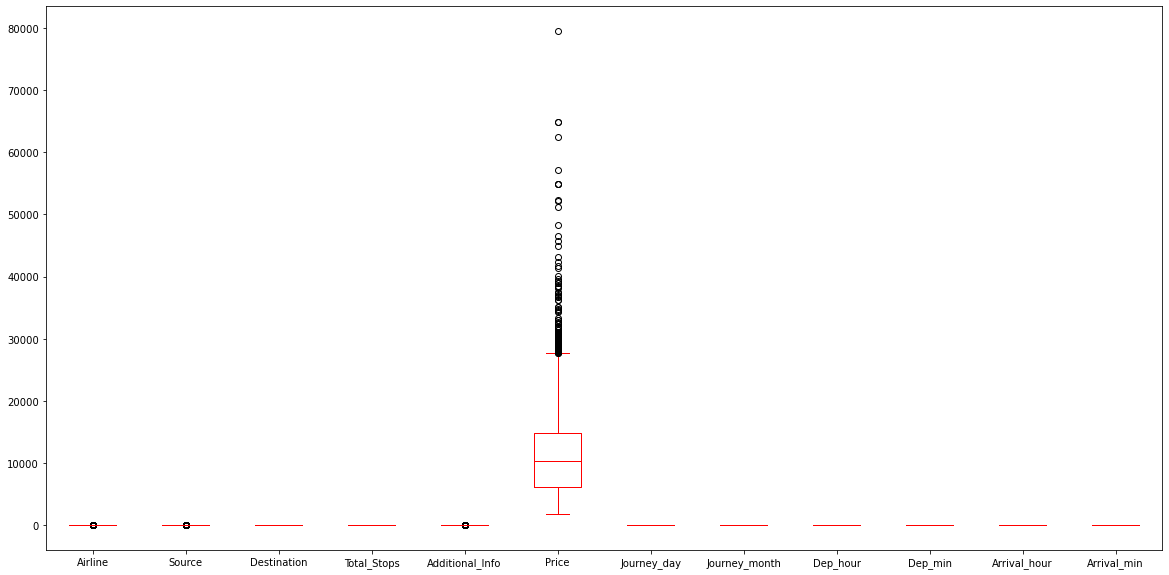

In [33]:
data.plot(kind='box', figsize=(20,10), color='r')

In [34]:
q3=data.quantile(0.75)

In [35]:
q1=data.quantile(0.25)

In [36]:
iqr=q3-q1

In [37]:
price=(q3.Price+(1.5*iqr.Price))

In [38]:
import numpy as np
index1=np.where(data['Price']>price)

In [39]:
data=data.drop(data.index[index1])

In [40]:
data.reset_index()

,index,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,0,3,0,5,4,8,3897,24,3,22,20,1,10
1,1,1,3,0,1,8,7662,1,5,5,50,13,15
2,2,4,2,1,1,8,13882,9,6,9,25,4,25
3,3,3,3,0,0,8,6218,12,5,18,5,23,30
4,4,3,0,5,0,8,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13009,2666,1,3,0,0,8,14046,6,6,20,30,20,25
13010,2667,3,3,0,4,8,14086,27,3,14,20,16,55
13011,2668,4,2,1,0,8,22720,6,3,21,50,4,25
13012,2669,1,2,1,0,8,23544,6,3,4,0,19,15


<AxesSubplot:>

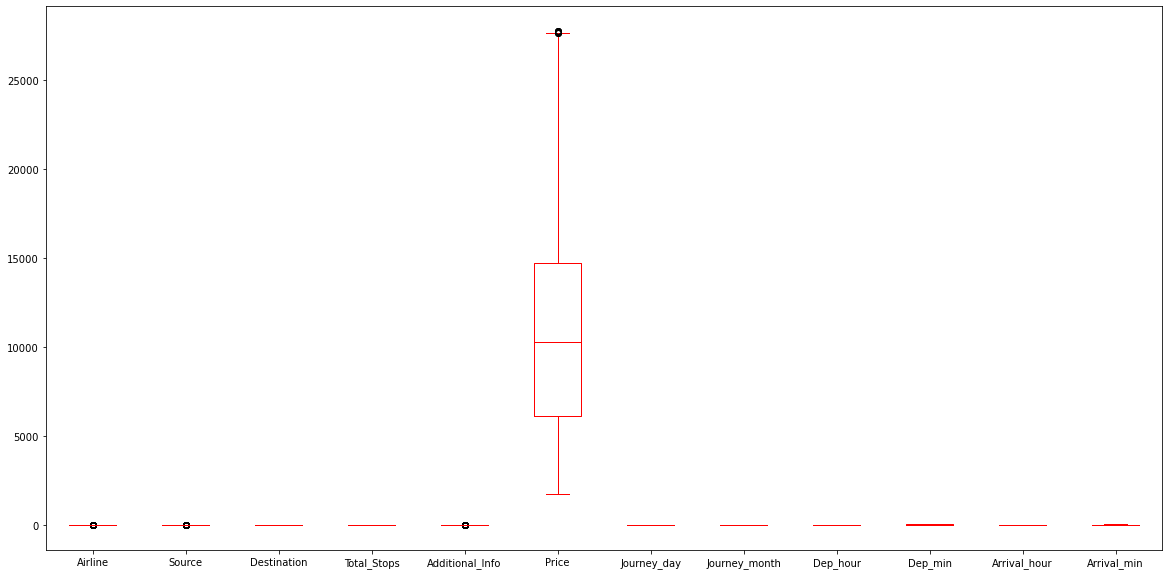

In [41]:
data.plot(kind='box', figsize=(20,10), color='r')

# Pre-processing Pipeline

In [42]:
x=data.drop(columns='Price')
y=data['Price']

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.4127915 , -1.66401666,  2.43399119, ..., -0.23924611,
        -1.7975897 , -0.88391458],
       [-1.25865335,  0.88559044, -0.97393166, ...,  1.3547209 ,
        -0.05749506, -0.58207877],
       [ 0.01013942,  0.0357214 , -0.29234709, ...,  0.02641506,
        -1.36256604,  0.02159283],
       ...,
       [ 0.01013942,  0.0357214 , -0.29234709, ...,  1.3547209 ,
        -1.36256604,  0.02159283],
       [-1.25865335,  0.0357214 , -0.29234709, ..., -1.30189079,
         0.81255226, -0.58207877],
       [ 0.85600127,  0.0357214 , -0.29234709, ...,  1.62038207,
         0.81255226, -0.58207877]])

In [78]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [45]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)
           for i in range(x_scaled.shape[1])]
vif["feature"]=x.columns
vif

,vif,feature
0,1.018157,Airline
1,1.535130,Source
2,1.890216,Destination
3,1.247325,Total_Stops
4,1.042610,Additional_Info
5,1.009650,Journey_day
6,1.194260,Journey_month
7,1.020166,Dep_hour
8,1.026579,Dep_min
9,1.033641,Arrival_hour


# Building Machine Learning Models

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=355)

# Linear Regression

In [81]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [82]:
pred=lr.predict(x_test)

In [83]:
lr.score(x_train,y_train)

0.1558758099290788

In [84]:
lr.score(x_test,y_test)

0.11800588860589234

In [85]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 4285.3408753881
MSE: 30601265.45273554
RMSE: 5531.841054543735


In [86]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.11800588860589234

# Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [90]:
predict_t=tree.predict(x_test)
predict_t

array([ 6860.,  6442., 12121., ...,  4174.,  4174.,  5162.])

In [91]:
tree.score(x_train,y_train)

0.9792990068470045

In [92]:
tree.score(x_test,y_test)

-0.5296633781676146

In [93]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_t))
print('MSE:', metrics.mean_squared_error(y_test, predict_t))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_t)))

MAE: 4418.935830132308
MSE: 53072502.96109866
RMSE: 7285.08771128383


In [94]:
r2_score(y_test, predict_t)

-0.5296633781676146

Decision tree is complete unfit, neglecting this model

# Knn regression

In [96]:
from sklearn.neighbors import KNeighborsRegressor

In [97]:
knn= KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [98]:
predict_k=knn.predict(x_test)

In [99]:
knn.score(x_train,y_train)

0.42846202262203037

In [100]:
knn.score(x_test,y_test)

0.1211596298591382

In [101]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_k))
print('MSE:', metrics.mean_squared_error(y_test, predict_k))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_k)))

MAE: 3869.6808706786173
MSE: 30491844.68448656
RMSE: 5521.942111656601


In [103]:
r2_score(y_test, predict_k)

0.1211596298591382

# AdaBoost

In [106]:
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor

In [107]:
model = AdaBoostRegressor()

In [108]:
model.fit(x_train, y_train)

AdaBoostRegressor()

In [109]:
predict_a=model.predict(x_test)

In [110]:
model.score(x_train,y_train)

0.1117454273950067

In [111]:
model.score(x_test,y_test)

0.09964427511600582

In [112]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_a))
print('MSE:', metrics.mean_squared_error(y_test, predict_a))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_a)))

MAE: 4677.001156123513
MSE: 31238331.62050894
RMSE: 5589.126194720328


In [113]:
r2_score(y_test, predict_a)

0.09964427511600582

# Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [116]:
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [117]:
predict_r=model.predict(x_test)

In [118]:
regressor.score(x_train,y_train)

0.8671846036233862

In [119]:
regressor.score(x_test,y_test)

0.15281866553179002

In [120]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_r))
print('MSE:', metrics.mean_squared_error(y_test, predict_r))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_r)))

MAE: 4677.001156123513
MSE: 31238331.62050894
RMSE: 5589.126194720328


In [121]:
r2_score(y_test, predict_r)

0.09964427511600582

# Concluding Remark
Considering KNN as best model as it gives lower RMSE value and R2 score is better from others.

In [123]:
import pickle
filename='Flight Price Prediction.pickle'
pickle.dump(knn,open(filename,'wb'))